In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams["figure.figsize"] = (12,6)


In [3]:
#birds_url = "../data/birds.csv"
birds_url = "../DataScience/data/birds.csv"


In [4]:
birds_df = pd.read_csv(birds_url)


In [5]:
birds_df.head()

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0


In [76]:
birds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                443 non-null    object 
 1   ScientificName      443 non-null    object 
 2   Category            443 non-null    object 
 3   Order               443 non-null    object 
 4   Family              443 non-null    object 
 5   Genus               443 non-null    object 
 6   ConservationStatus  443 non-null    object 
 7   MinLength           443 non-null    float64
 8   MaxLength           443 non-null    float64
 9   MinBodyMass         443 non-null    float64
 10  MaxBodyMass         443 non-null    float64
 11  MinWingspan         443 non-null    float64
 12  MaxWingspan         443 non-null    float64
dtypes: float64(6), object(7)
memory usage: 45.1+ KB


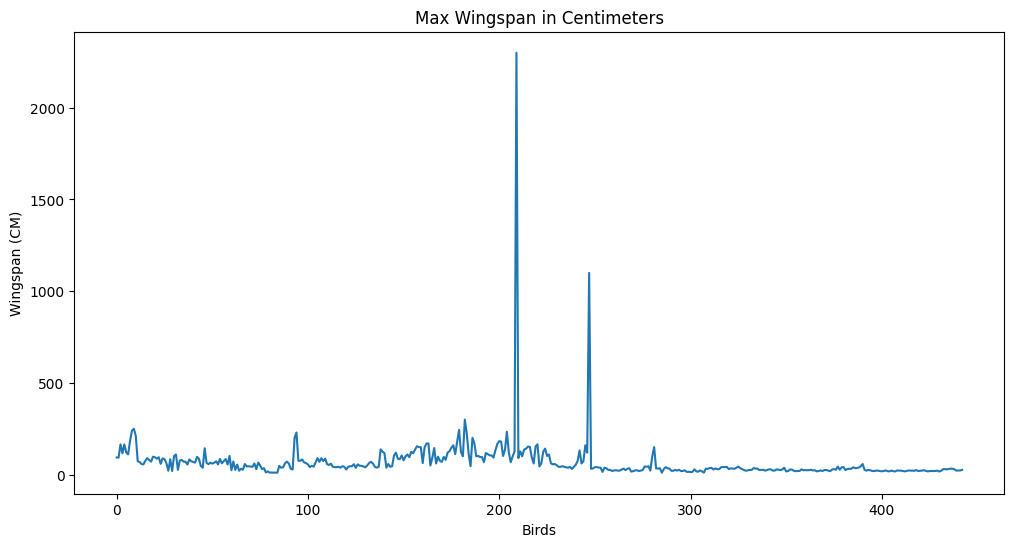

In [7]:
# Visualize birds wingspan
plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.xlabel('Birds')
wingspan = birds_df.MaxWingspan 
wingspan.plot()
plt.show()

In [8]:
# Check outliers
birds_df[birds_df["MaxWingspan"] > 500]

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
209,Bald eagle,Haliaeetus leucocephalus,Hawks/Eagles,Accipitriformes,Accipitridae,Haliaeetus,LC,70.0,102.0,3000.0,6300.0,1800.0,2300.0
247,Prairie falcon,Falco mexicanus,Falcons /Caracaras,Falconformes,Falconidae,Falco,LC,37.0,45.0,500.0,970.0,1100.0,1100.0


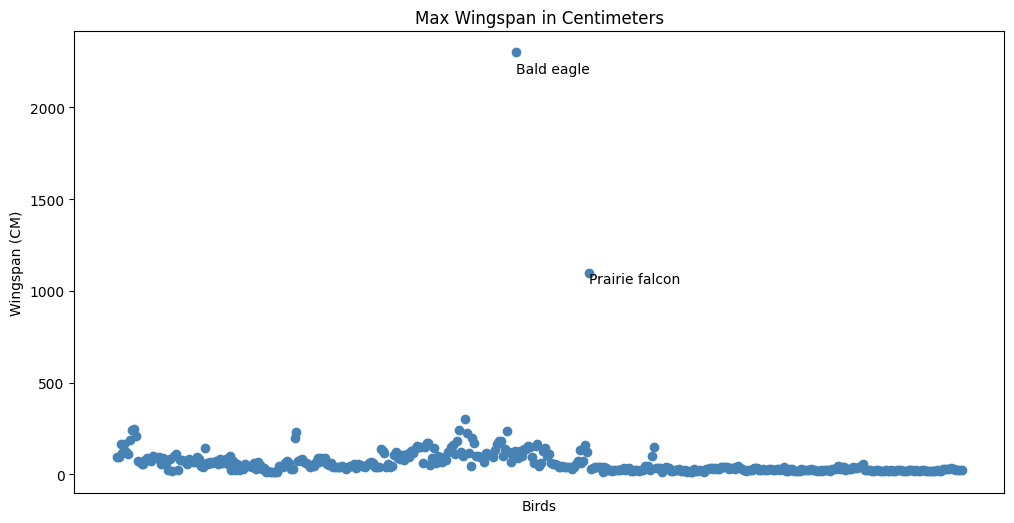

In [10]:
# Label outliers
plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.xlabel('Birds')
plt.tick_params(axis='both', which='both', labelbottom=False, bottom=False)

for i in range(len(birds_df)):
    x = birds_df['Name'][i]
    y = birds_df['MaxWingspan'][i]
    plt.plot(x, y, "o", color="steelblue")
    if birds_df['MaxWingspan'][i] > 500:
        plt.text(x, y * (1 - 0.05), birds_df['Name'][i], fontsize=10,)
    
plt.show()

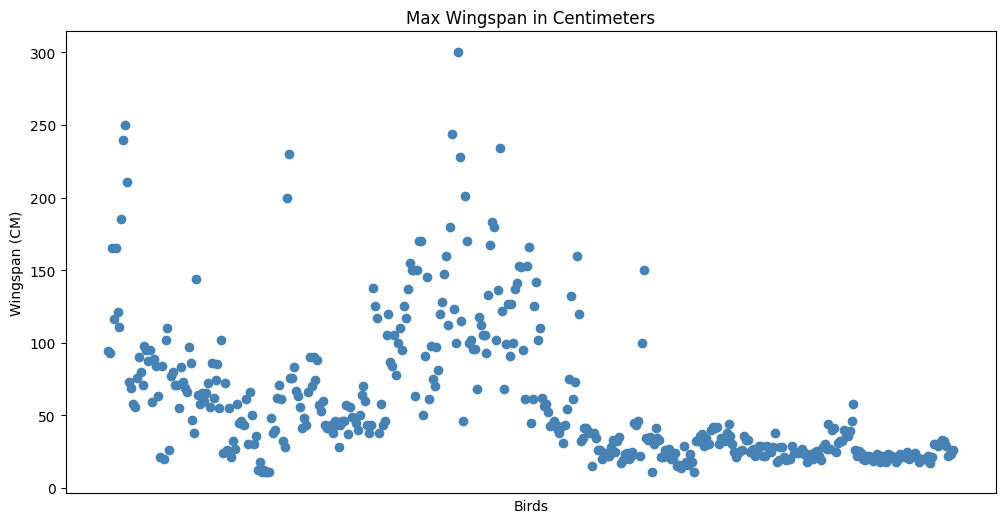

In [12]:
# 1- Remove outliers in plot

plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.xlabel('Birds')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

for i in range(len(birds_df)):
    x = birds_df['Name'][i]
    y = birds_df['MaxWingspan'][i]
    if birds_df['Name'][i] not in ['Bald eagle', 'Prairie falcon']:
        plt.plot(x, y, "o", color="steelblue")
plt.show()

In [14]:
# 2- Remove outliers before plot
birds = birds_df[birds_df["MaxWingspan"] < 500]

In [15]:
birds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 441 entries, 0 to 442
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                441 non-null    object 
 1   ScientificName      441 non-null    object 
 2   Category            441 non-null    object 
 3   Order               441 non-null    object 
 4   Family              441 non-null    object 
 5   Genus               441 non-null    object 
 6   ConservationStatus  441 non-null    object 
 7   MinLength           441 non-null    float64
 8   MaxLength           441 non-null    float64
 9   MinBodyMass         441 non-null    float64
 10  MaxBodyMass         441 non-null    float64
 11  MinWingspan         441 non-null    float64
 12  MaxWingspan         441 non-null    float64
dtypes: float64(6), object(7)
memory usage: 48.2+ KB


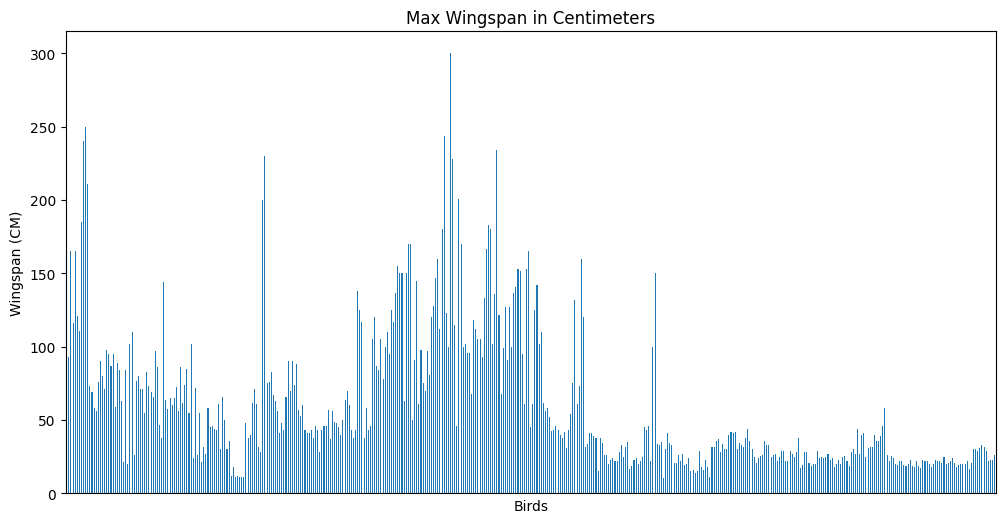

In [16]:
plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.xlabel('Birds')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)
wingspan = birds.MaxWingspan 
wingspan.plot(kind="bar")
plt.show()

In [17]:
# Check other big values
birds[birds["MaxWingspan"] > 200][["Name", "MaxWingspan"]]

,Name,MaxWingspan
8,Mute swan,240.0
9,Trumpeter swan,250.0
10,Tundra swan,211.0
94,Whooping crane,230.0
179,Magnificent frigatebird,244.0
182,American white pelican,300.0
183,Brown pelican,228.0
186,Great blue heron,201.0
204,Golden eagle,234.0


In [ ]:
# Check literature to validate info:
# https://en.wikipedia.org/wiki/Great_blue_heron

<Axes: >

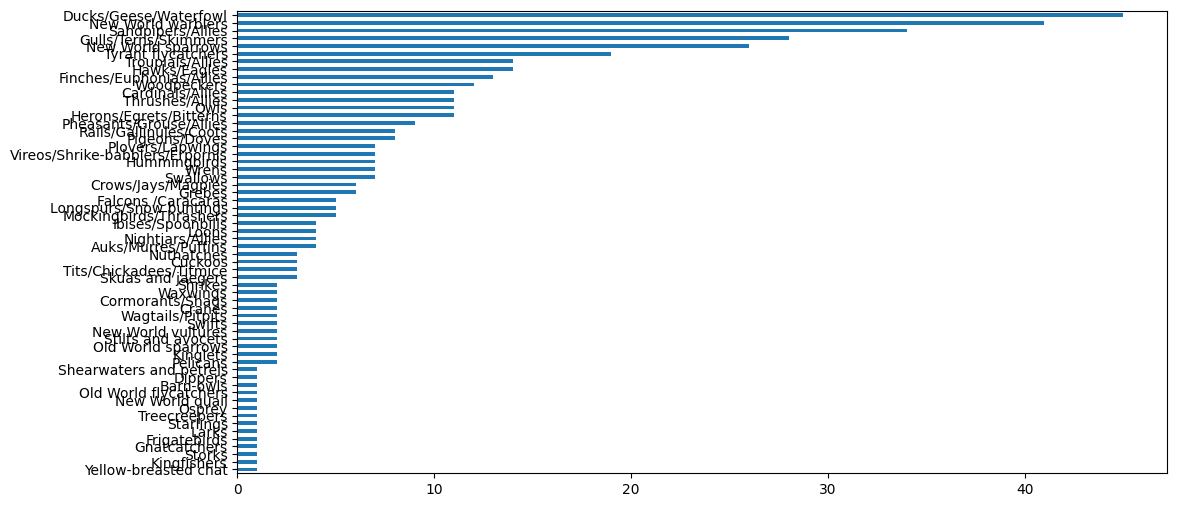

In [18]:
category_count = birds.value_counts(birds['Category'].values, ascending=True)
category_count.plot.barh()

<BarContainer object of 443 artists>

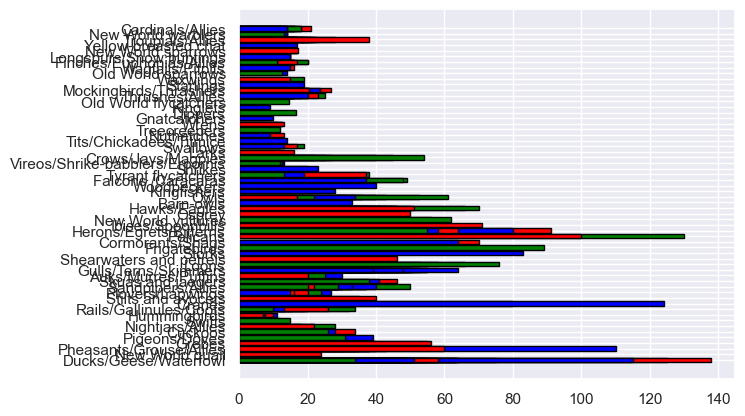

In [79]:
plt.barh(y=birds_df.Category,
          width=birds_df.MinLength,
          color =['red', 'blue', 'green'],
          edgecolor='black'
          
          )

In [88]:
total=birds_df.groupby("Family")["MinLength"].mean().reset_index()

In [89]:
total

,Family,MinLength
0,Accipitridae,43.400000
1,Alaudidae,16.000000
2,Alcedinidae,28.000000
3,Alcidae,23.500000
4,Anatidae,51.817778
5,Apodidae,13.500000
6,Ardeidae,57.545455
7,Bombycillidae,17.000000
8,Calcariidae,14.600000
9,Caprimulgidae,22.500000


<BarContainer object of 59 artists>

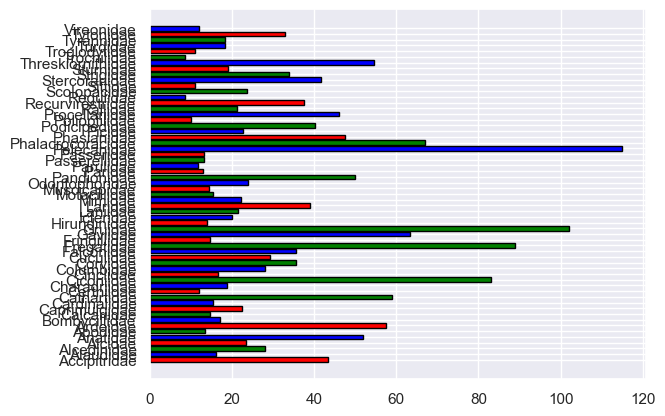

In [91]:
plt.barh(y=total.Family,
          width=total.MinLength,
          color =['red', 'blue', 'green'],
          edgecolor='black'
          
          )

In [92]:
total=birds_df.groupby("Order")["MinLength"].mean().reset_index()

In [93]:
total

,Order,MinLength
0,Accipitriformes,43.812500
1,Anseriformes,51.817778
2,Apodiformes,9.577778
3,Caprimulgiformes,22.500000
4,Cathartiformes,59.000000
5,Charadriiformes,29.820513
6,Ciconiiformes,83.000000
7,Columbiformes,28.062500
8,Coraciiformes,28.000000
9,Cuculiformes,29.333333


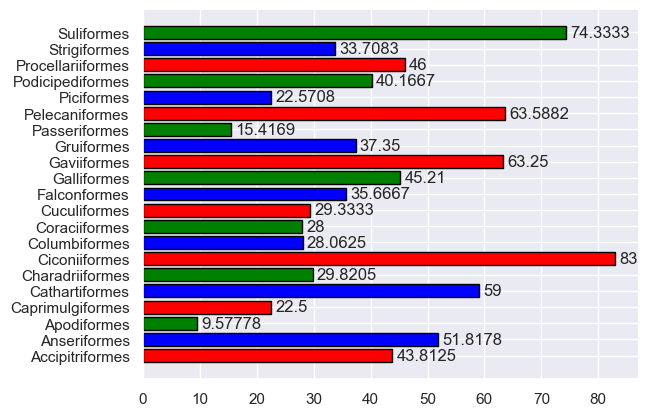

In [96]:
my_plot=plt.barh(y=total.Order,
          width=total.MinLength,
          color =['red', 'blue', 'green'],
          edgecolor='black'
          
          )
plt.bar_label(container= my_plot, padding=3)
plt.show()

In [103]:
birds_Anatidae = birds_df[birds_df['Family']== 'Anatidae'][['Family', 'MinLength']]

In [113]:
birds_Anatidae

,Family,MinLength
0,Anatidae,47.0
1,Anatidae,45.0
2,Anatidae,64.0
3,Anatidae,57.3
4,Anatidae,64.0
5,Anatidae,55.0
6,Anatidae,63.0
7,Anatidae,75.0
8,Anatidae,125.0
9,Anatidae,138.0


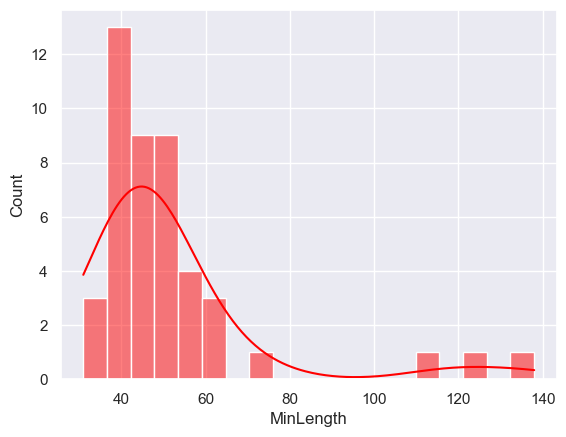

In [112]:

sns.set(style="darkgrid")
sns.histplot(data=birds_Anatidae,
             color = "red",
              x="MinLength",
                kde=True)
plt.show()


In [121]:
birds_df.groupby("ConservationStatus")["MaxBodyMass"].mean()

ConservationStatus
CR     360.000000
EN    4269.500000
EX     340.000000
LC     663.191095
NT     497.459259
VU     621.210000
Name: MaxBodyMass, dtype: float64

<Figure size 10000x2000 with 0 Axes>

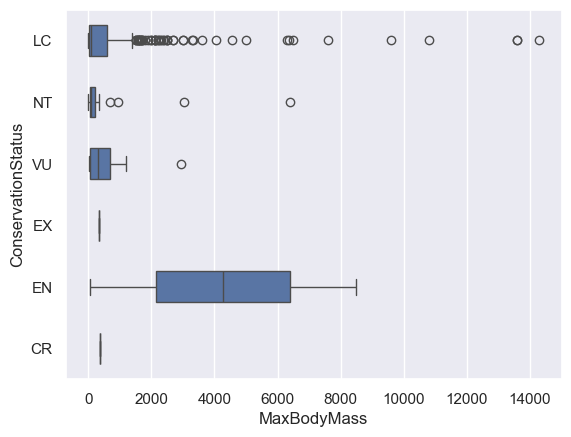

<Figure size 10000x2000 with 0 Axes>

In [136]:
sns.set_theme(style="darkgrid")
sns.boxplot(x=birds_df['MaxBodyMass'], 
            y=birds_df['ConservationStatus'],
            width=0.5
            
        
            )
plt.figure(figsize=(100, 20))


<Figure size 10000x2000 with 0 Axes>

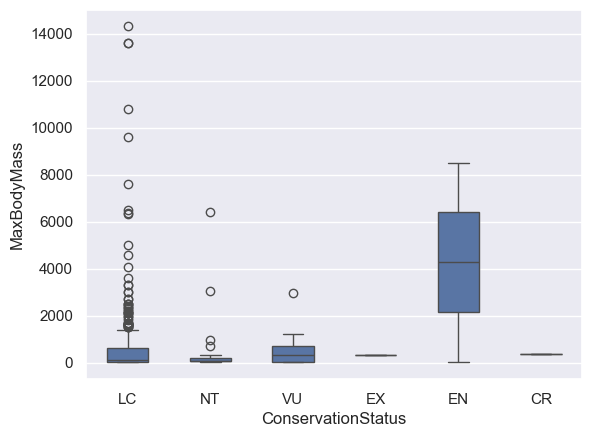

<Figure size 10000x2000 with 0 Axes>

In [137]:
sns.set_theme(style="darkgrid")
sns.boxplot(x=birds_df['ConservationStatus'], 
            y=birds_df['MaxBodyMass'],
            width=0.5
            
        
            )
plt.figure(figsize=(100, 20))


In [139]:
birds_df['Family'].unique()

array(['Anatidae', 'Odontophoridae', 'Phasianidae', 'Podicipedidae',
       'Columbidae', 'Cuculidae', 'Caprimulgidae', 'Apodidae',
       'Trochilidae', 'Rallidae', 'Gruidae', 'Recurvirostridae',
       'Charadriidae', 'Scolopacidae', 'Stercorariidae', 'Alcidae',
       'Laridae', 'Gaviidae', 'Procellariidae', 'Ciconiidae',
       'Fregatidae', 'Phalacrocoracidae', 'Pelecanidae', 'Ardeidae',
       'Threskiornithidae', 'Cathartidae', 'Pandionidae', 'Accipitridae',
       'Tytonidae', 'Strigidae', 'Alcedinidae', 'Picidae', 'Falconidae',
       'Tyrannidae', 'Laniidae', 'Vireonidae', 'Corvidae', 'Alaudidae',
       'Hirundinidae', 'Paridae', 'Sittidae', 'Certhiidae',
       'Troglodytidae', 'Polioptilidae', 'Cinclidae', 'Regulidae',
       'Muscicapidae', 'Turdidae', 'Mimidae', 'Sturnidae',
       'Bombycillidae', 'Passeridae', 'Motacillidae', 'Fringillidae',
       'Calcariidae', 'Passerellidae', 'Icteridae', 'Parulidae',
       'Cardinalidae'], dtype=object)

In [146]:
birds_pa=birds_df[birds_df['Family']== 'Paridae']

In [147]:
birds_pa

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
290,Black-capped chickadee,Poecile atricapilla,Tits/Chickadees/Titmice,Passeriformes,Paridae,Poecile,LC,12.0,15.0,9.0,14.0,16.0,21.0
291,Boreal chickadee,Poecile hudsonica,Tits/Chickadees/Titmice,Passeriformes,Paridae,Poecile,LC,13.0,14.0,10.0,10.0,21.0,21.0
292,Tufted titmouse,Baeolophus bicolor,Tits/Chickadees/Titmice,Passeriformes,Paridae,Baeolophus,LC,14.0,16.0,18.0,26.0,20.0,26.0


<Axes: xlabel='MinLength', ylabel='MinBodyMass'>

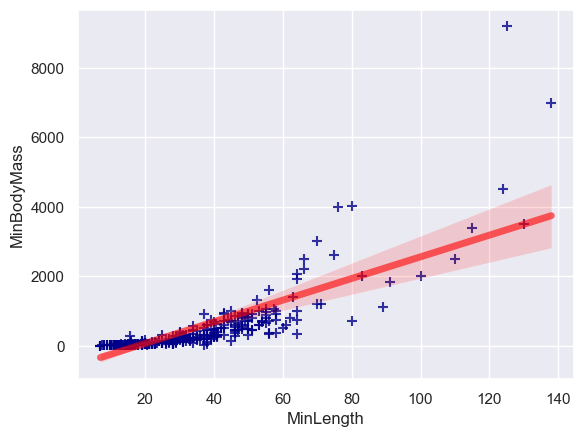

In [151]:
sns.regplot(
    x=birds_df['MinLength'],
    y=birds_df['MinBodyMass'],
    marker= "+",
    line_kws={
        "color":"red",
        "alpha":0.6,
        "lw":5 
    },
    scatter_kws={
        "color":"darkblue",
        "s":50
    }
    )

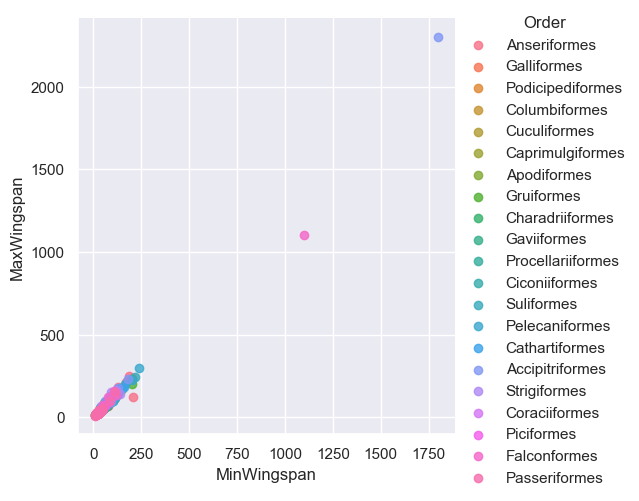

In [154]:
sns.lmplot(
        x='MinWingspan',
        y= 'MaxWingspan', 
        data=birds_df,
        hue="Order",
        fit_reg=False
          
     )

(0.0, 300.0)

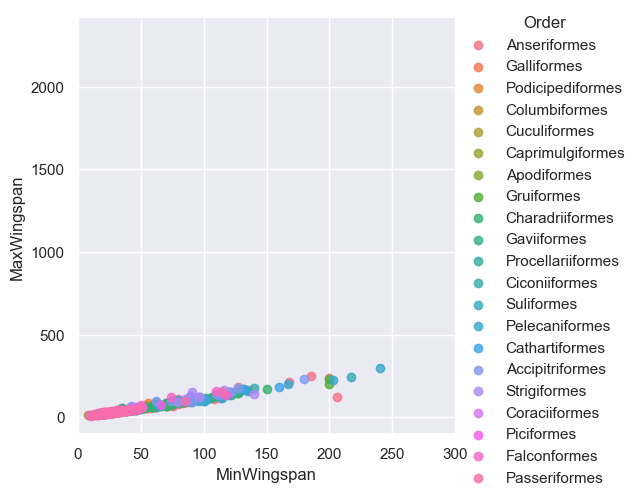

In [158]:
sns.lmplot(
        x='MinWingspan',
        y= 'MaxWingspan', 
        data=birds_df,
        hue="Order",
        fit_reg=False
          
     )
plt.xlim(0, 300)

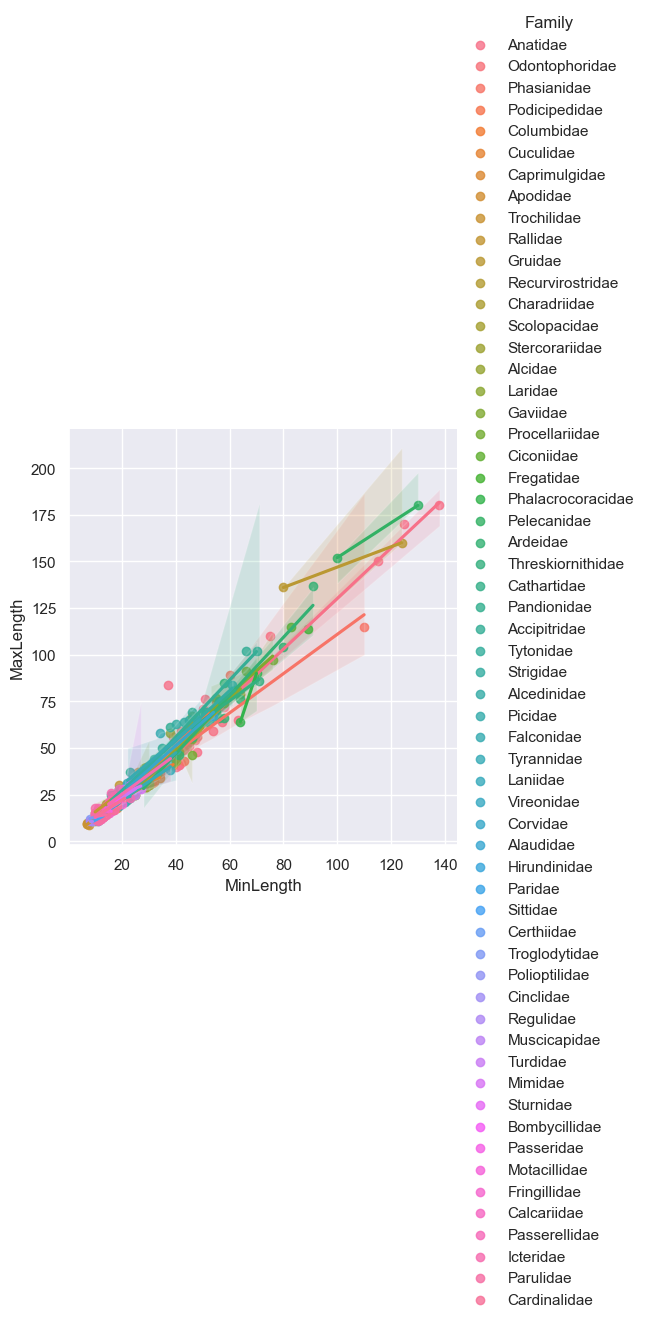

In [155]:
sns.lmplot(
        x='MinLength',
        y= 'MaxLength', 
        data=birds_df,
        hue="Family",
        fit_reg=True
          
     )